In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import neighbors
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
credit_data = pd.read_csv("https://storage.googleapis.com/kaggle-forum-message-attachments/237294/7771/german_credit_data.csv")

In [2]:
credit_data.head(10)
# There are 11 attributes
# Attribute "Unamed:0" seems to be used for indexing
# Age: is the age of the person asking for the loan
# Sex: is the sexual orientation of the person applying 
# Job: is the number of jobs the individual has had
# Housing: describes there living situation 
# Saving accounts: categorical description of the individuals savings amount
# Checking account: categorical description of the individuals checkings amount
# credit amount: Amount the individual is seeking
# Duration: length of the loan
# Purpose: reason the individual is applying for the loan
# Risk: Risk involved with loan


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
credit_data.info()

# There are 1000 instances in the dataset, which means this is a very small dataset
# Saving accounts is missing 183 entries 
# Checking account is missing 394 entries 
# The data set is comprised of numerical and categorical attributes
# aka object is a txt attribute


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [4]:
credit_data["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [5]:
credit_data["Housing"].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [6]:
credit_data["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
credit_data["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [8]:
credit_data["Purpose"].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [9]:
credit_data["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [10]:
credit_data.describe()

# The mean age individuals apply is around 35 years old. 
# Youngest individual is 19 and oldest is 75

# The mean number of jobs an individual has had is about 2
# Some individuals had 0 job experience, while others had 3

# The mean credit amount is around 3271 dollars with a payment duration of 20 months


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


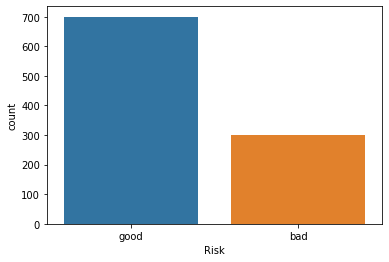

In [11]:
import seaborn as sns
sns.countplot(x = "Risk", data = credit_data)

# We can see how unbalanced this dataframe is

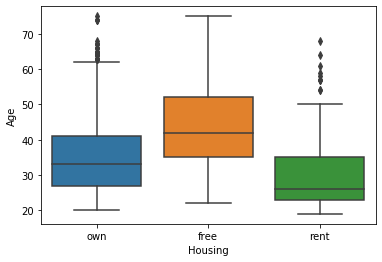

In [12]:
sns.boxplot(x = "Housing", y = "Age", data = credit_data)

In [13]:
corr_matrix = credit_data.corr()

corr_matrix["Credit amount"].sort_values(ascending = False)

Credit amount    1.000000
Duration         0.624984
Job              0.285385
Age              0.032716
Unnamed: 0       0.013488
Name: Credit amount, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ca594e0>,
      dtype=object)

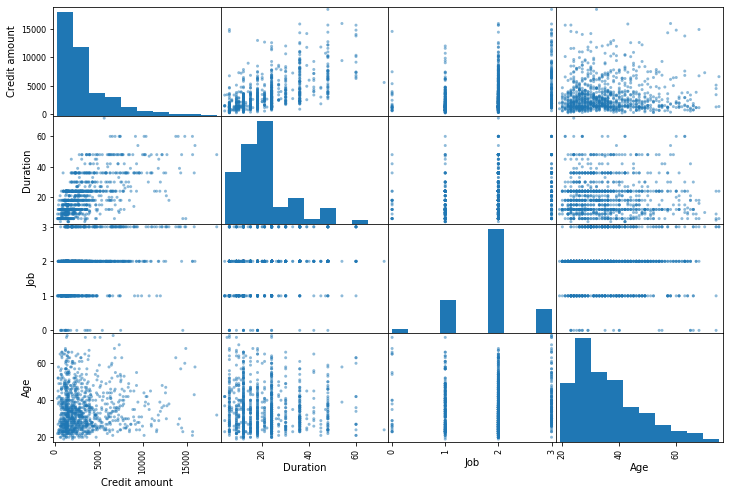

In [14]:
attributes = ["Credit amount", "Duration", "Job", "Age"]

scatter_matrix(credit_data[attributes], figsize = (12, 8))


In [15]:
# credit_data_V2 is an altered version of credit_data.  All Na's have been removed.

credit_data_V2 = credit_data.drop(["Unnamed: 0"], axis=1)
credit_data_V2 = credit_data_V2.dropna()


In [16]:
credit_data_V2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
Age                 522 non-null int64
Sex                 522 non-null object
Job                 522 non-null int64
Housing             522 non-null object
Saving accounts     522 non-null object
Checking account    522 non-null object
Credit amount       522 non-null int64
Duration            522 non-null int64
Purpose             522 non-null object
Risk                522 non-null object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB


In [17]:
# One Hot Encoding dataframe: credit_data_V2
credit_data_V2 = pd.concat([credit_data_V2, pd.get_dummies(credit_data_V2["Sex"], prefix = "sex")], axis = 1)
credit_data_V2.drop(["Sex"], axis = 1, inplace = True)

credit_data_V2 = pd.concat([credit_data_V2, pd.get_dummies(credit_data_V2["Housing"], prefix = "housing")], axis = 1)
credit_data_V2.drop(["Housing"], axis = 1, inplace = True)

credit_data_V2 = pd.concat([credit_data_V2, pd.get_dummies(credit_data_V2["Saving accounts"], prefix = "savings")], axis = 1)
credit_data_V2.drop(["Saving accounts"], axis = 1, inplace = True)

credit_data_V2 = pd.concat([credit_data_V2, pd.get_dummies(credit_data_V2["Checking account"], prefix = "checkings")], axis = 1)
credit_data_V2.drop(["Checking account"], axis = 1, inplace = True)

credit_data_V2 = pd.concat([credit_data_V2, pd.get_dummies(credit_data_V2["Purpose"], prefix = "purpose")], axis = 1)
credit_data_V2.drop(["Purpose"], axis = 1, inplace = True)


In [18]:
credit_data_V2.head(100)

,Age,Job,Credit amount,Duration,Risk,sex_female,sex_male,housing_free,housing_own,housing_rent,...,checkings_moderate,checkings_rich,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
1,22,2,5951,48,bad,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,45,2,7882,42,good,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,bad,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,35,3,6948,36,good,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
9,28,3,5234,30,bad,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
10,25,2,1295,12,bad,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
11,24,2,4308,48,bad,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
12,22,2,1567,12,good,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
13,60,1,1199,24,bad,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14,28,2,1403,15,good,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [19]:
X_2, y_2 = credit_data_V2.loc[:, credit_data_V2.columns != 'Risk'], credit_data_V2[["Risk"]]

X_train_V2, X_test_V2, y_train_V2, y_test_V2 = train_test_split(X_2, y_2, random_state=33)

knn_2 = neighbors.KNeighborsClassifier(n_neighbors=5)

knn_model_2 = knn_2.fit(X_train_V2, np.ravel(y_train_V2,order='C'))

y_pred_2 = knn_2.predict(X_test_V2)


In [20]:
# credit_data_V3 is a new dataframe created by assigning categorical values to NaNs in Savings account and Checking account
# The idea behind these conditional statements isn't very logical...
# Too be fair... these two columns are very terrible.
# What is considered "little", "moderate", "rich", "Quite rich" for Savings and Checking accounts?
# The above question seems easy to answer but with this little amount of data... no information can really be obtained.
# Also, some people have (large savings & small, moderate, and rich checkings) and (large checkings & small, moderate, and rich savings)
# We do not know anything about the person... besides the sex and age...

# I decided to match Savings and Checking accounts where either one has an NaN value. 
# I based my decision primarily on... if you have a value for savings, you have that same categorical value for checkings
# And vice-versus 
# Depending on which has the NaN value

# Factoring in age to the conditions may increase model performance 


credit_data_V3 = credit_data.drop(["Unnamed: 0"], axis = 1)
credit_data_V3 = credit_data_V3.drop(["Age"], axis = 1) #Droping the Age column seemed to improve my model later on
credit_data_V3.fillna("change", inplace=True)

filter = (credit_data_V3['Saving accounts'] == "change") & (credit_data_V3['Checking account'] == "little") 

credit_data_V3['Saving accounts'] = credit_data_V3['Saving accounts'].where(~filter, "little")

filter = (credit_data_V3['Checking account'] == "change") & (credit_data_V3['Saving accounts'] == "little")

credit_data_V3['Checking account'] = credit_data_V3['Checking account'].where(~filter, "little")

#------------------------------------------------------------------------------------------------------------------#

filter = (credit_data_V3['Saving accounts'] == "change") & (credit_data_V3['Checking account'] == "moderate")

credit_data_V3['Saving accounts'] = credit_data_V3['Saving accounts'].where(~filter, "moderate")

filter = (credit_data_V3['Checking account'] == "change") & (credit_data_V3['Saving accounts'] == "moderate")

credit_data_V3['Checking account'] = credit_data_V3['Checking account'].where(~filter, "moderate")

#-------------------------------------------------------------------------------------------------------------------#


filter = (credit_data_V3['Saving accounts'] == "change") & (credit_data_V3['Checking account'] == "rich")

credit_data_V3['Saving accounts'] = credit_data_V3['Saving accounts'].where(~filter, "rich")

filter = (credit_data_V3['Checking account'] == "change") & (credit_data_V3['Saving accounts'] == "rich")

credit_data_V3['Checking account'] = credit_data_V3['Checking account'].where(~filter, "rich")
#-------------------------------------------------------------------------------------------------------------------#

filter = (credit_data_V3['Saving accounts'] == "quite rich") & (credit_data_V3['Checking account'] == "change")

credit_data_V3['Checking account'] = credit_data_V3['Checking account'].where(~filter, "quite rich")




In [21]:
# Drop rows with both Savings account and Checking account having NaN values

credit_data_V3 = credit_data_V3.replace("change", np.nan)
credit_data_V3 = credit_data_V3.dropna()

In [22]:
credit_data_V3.head(100)

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,male,2,own,little,little,1169,6,radio/TV,good
1,female,2,own,little,moderate,5951,48,radio/TV,bad
2,male,1,own,little,little,2096,12,education,good
3,male,2,free,little,little,7882,42,furniture/equipment,good
4,male,2,free,little,little,4870,24,car,bad
6,male,2,own,quite rich,quite rich,2835,24,furniture/equipment,good
7,male,3,rent,little,moderate,6948,36,car,good
8,male,1,own,rich,rich,3059,12,radio/TV,good
9,male,3,own,little,moderate,5234,30,car,bad
10,female,2,rent,little,moderate,1295,12,car,bad


In [23]:
#One Hot Encoding dataframe credit_data_V3

credit_data_V3 = pd.concat([credit_data_V3, pd.get_dummies(credit_data_V3["Sex"], prefix = "sex")], axis = 1)
credit_data_V3.drop(["Sex"], axis = 1, inplace = True)

credit_data_V3 = pd.concat([credit_data_V3, pd.get_dummies(credit_data_V3["Housing"], prefix = "housing")], axis = 1)
credit_data_V3.drop(["Housing"], axis = 1, inplace = True)

credit_data_V3 = pd.concat([credit_data_V3, pd.get_dummies(credit_data_V3["Saving accounts"], prefix = "savings")], axis = 1)
credit_data_V3.drop(["Saving accounts"], axis = 1, inplace = True)

credit_data_V3 = pd.concat([credit_data_V3, pd.get_dummies(credit_data_V3["Checking account"], prefix = "checkings")], axis = 1)
credit_data_V3.drop(["Checking account"], axis = 1, inplace = True)

credit_data_V3 = pd.concat([credit_data_V3, pd.get_dummies(credit_data_V3["Purpose"], prefix = "purpose")], axis = 1)
credit_data_V3.drop(["Purpose"], axis = 1, inplace = True)

In [24]:
#Creating training and testing sets
#Fitting and predicting Knn algorithm model for: credit_data_V3


X_3, y_3 = credit_data_V3.loc[:, credit_data_V3.columns != 'Risk'], credit_data_V3[["Risk"]]

X_train_V3, X_test_V3, y_train_V3, y_test_V3 = train_test_split(X_3, y_3, random_state=33)

knn_3 = neighbors.KNeighborsClassifier(n_neighbors=7)

knn_model_3 = knn_3.fit(X_train_V3, np.ravel(y_train_V3,order='C'))

y_pred_3 = knn_3.predict(X_test_V3)


In [25]:
# Fitting and predicting Naive Bayes algorithm model for: credit_data_V2

gnb_2 = GaussianNB()
gnb_model_2 = gnb_2.fit(X_train_V2, y_train_V2)
gnb_pred_2 = gnb_2.predict(X_test_V2)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Fitting and predicting Naive Bayes algorithm model for: credit_data_V3

gnb_3 = GaussianNB()
gnb_model_3 = gnb_3.fit(X_train_V3, y_train_V3)
gnb_pred_3 = gnb_3.predict(X_test_V3)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Fitting and predicting Decision Tree algorithm model for: credit_data_V2

clf2 = tree.DecisionTreeClassifier()
clf2_model = clf2.fit(X_train_V2, y_train_V2)
clf2_pred = clf2.predict(X_test_V2)

In [28]:
# Fitting and predicting Decision Tree algorithm model for: credit_data_V3

clf3 = tree.DecisionTreeClassifier()
clf3_model = clf3.fit(X_train_V3, y_train_V3)
clf3_pred = clf3.predict(X_test_V3)

In [29]:
# Fitting and predicting Logistic Regression algorithm model for: credit_data_V2

lR2 = LogisticRegression()
lR2_model = lR2.fit(X_train_V2, y_train_V2)
lR2_pred = lR2.predict(X_test_V2)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Fitting and predicting Logistic Regression algorithm model for: credit_data_V3

lR3 = LogisticRegression()
lR3_model = lR3.fit(X_train_V3, y_train_V3)
lR3_pred = lR3.predict(X_test_V3)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# KNN results for Data Set: credit_data_V2

print("Accuracy_Score = ", accuracy_score(y_test_V2, y_pred_2))
print("Precision Score = ", precision_score(y_test_V2, y_pred_2, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test_V2, y_pred_2, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test_V2, y_pred_2, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V2, y_pred_2, average = "binary", pos_label = "bad"))

print("CM", confusion_matrix(y_test_V2, y_pred_2))

Accuracy_Score =  0.5648854961832062
Precision Score =  0.5294117647058824
Recall Score =  0.5901639344262295
f1 score good =  0.5581395348837209
f1 score bad =  0.5714285714285714
CM [[38 32]
 [25 36]]


In [32]:
# Naive Bayes Algorithm results for Data Set: credit_data_V2

print("Accuracy_Score = ", accuracy_score(y_test_V2, gnb_pred_2))
print("Precision Score = ", precision_score(y_test_V2, gnb_pred_2, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test_V2, gnb_pred_2, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test_V2, gnb_pred_2, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V2, gnb_pred_2, average = "binary", pos_label = "bad"))

print("CM",confusion_matrix(y_test_V2, gnb_pred_2))

Accuracy_Score =  0.5954198473282443
Precision Score =  0.6052631578947368
Recall Score =  0.3770491803278688
f1 score good =  0.46464646464646464
f1 score bad =  0.6748466257668712
CM [[55 15]
 [38 23]]


In [33]:
# Decision Tree Algorithm results for dataset: credit_data_V2

print("Accuracy_Score = ", accuracy_score(y_test_V2, clf2_pred))
print("f1 score good = ", f1_score(y_test_V2, clf2_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V2, clf2_pred, average = "binary", pos_label = "bad"))

Accuracy_Score =  0.5419847328244275
f1 score good =  0.5522388059701493
f1 score bad =  0.53125


In [34]:
# Logistic Regression results for dataset: credit_data_V2

score2 = lR2.score(X_test_V2, y_test_V2)
print(score2)

print("Accuracy_Score = ", accuracy_score(y_test_V2, lR2_pred))
print("f1 score good = ", f1_score(y_test_V2, lR2_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V2, lR2_pred, average = "binary", pos_label = "bad"))

0.6030534351145038
Accuracy_Score =  0.6030534351145038
f1 score good =  0.6486486486486487
f1 score bad =  0.543859649122807


In [35]:
# KNN results for Data Set: credit_data_V3

print("Accuracy_Score = ", accuracy_score(y_test_V3, y_pred_3))
print("Precision Score = ", precision_score(y_test_V3, y_pred_3, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test_V3, y_pred_3, average = "binary", pos_label = "good"))
print("f1 score good = ", f1_score(y_test_V3, y_pred_3, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V3, y_pred_3, average = "binary", pos_label = "bad"))
print("CM", confusion_matrix(y_test_V3, y_pred_3))


Accuracy_Score =  0.5929203539823009
Precision Score =  0.6882352941176471
Recall Score =  0.75
f1 score good =  0.7177914110429447
f1 score bad =  0.2698412698412698
CM [[ 17  53]
 [ 39 117]]


In [36]:
# Naive Bayes Algorithm results for Data Set: credit_data_V3

print("Accuracy_Score = ", accuracy_score(y_test_V3, gnb_pred_3))
print("Precision Score = ", precision_score(y_test_V3, gnb_pred_3, average = "binary", pos_label = "good"))
print("Recall Score = ", recall_score(y_test_V3, gnb_pred_3, average = "binary", pos_label = "good"))

print("f1 score good = ", f1_score(y_test_V3, gnb_pred_3, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V3, gnb_pred_3, average = "binary", pos_label = "bad"))

print("CM",confusion_matrix(y_test_V3, gnb_pred_3))


Accuracy_Score =  0.6017699115044248
Precision Score =  0.7619047619047619
Recall Score =  0.6153846153846154
f1 score good =  0.6808510638297872
f1 score bad =  0.47058823529411764
CM [[40 30]
 [60 96]]


In [37]:
# Decision Tree Algorithm results for dataset: credit_data_V3

print("Accuracy_Score = ", accuracy_score(y_test_V3, clf3_pred))

print("f1 score good = ", f1_score(y_test_V3, clf3_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V3, clf3_pred, average = "binary", pos_label = "bad"))

Accuracy_Score =  0.5973451327433629
f1 score good =  0.7035830618892508
f1 score bad =  0.37241379310344824


In [38]:
# Logistic Regression results for dataset: credit_data_V3
# I was able to get an accuracy score of .68
 
print("Accuracy_Score = ", accuracy_score(y_test_V3, lR3_pred))
print("f1 score good = ", f1_score(y_test_V3, lR3_pred, average = "binary", pos_label = "good"))
print("f1 score bad = ", f1_score(y_test_V3, lR3_pred, average = "binary", pos_label = "bad"))

Accuracy_Score =  0.6946902654867256
f1 score good =  0.8034188034188035
f1 score bad =  0.31683168316831684
